# 作业说明 
本次作业分为以下三部分：

1. SQL练习题
2. PYTHON基础语法练习
3. PYTHON第三方库练习

需要注意的是，作业题必须独立自主完成，可以与同学在群里商量思路，但是**绝不可以直接讨论甚至发送答案**。 助教和老师也不会给予提示或者答案，所以请不要@老师和助教进行咨询！ 

作业将会在群内发布，需要大家按照群内提醒的要求进行作业提交，作业期限为3月4号, 作业讲解视频也会在3月4号发出


<div class="burk">
作业请用个人姓名保存，比如 小明.ipynb,按照QQ群内要求上传提交作业！ 只能用window的最新版本QQ，不支持MAC！！</div><i class="fa fa-lightbulb-o "></i>

## SQL练习题

<span class="mark">sql练习题的代码请自行在mysql中进行撰写和测试，然后把代码复制粘贴到此文本中</span>

使用workbench中自带的world数据库下的数据集

1. 请根据countrycode将将三张表进行组合，并且计算出left join , full outer join, inner join 三种条件的数据条数。注意：full outer join 没有直接的支持方式，请另想途径
2. 将上面题目1中的 inner join 筛选结果插入到一张临时表中，注意：该表不可以有重复的字段
3. 在country表中，对region进行分组，筛选出分组内数据条数大于5的数据，对于满足条件的组计算population的平均数,GNP的平均数

In [ ]:
use world;

# 根据countrycode将三张表进行组合，计算出left join 的数据条数
select count(*) from city 
left join country 
on city.CountryCode = country.Code 
left join countrylanguage 
on city.CountryCode = countrylanguage.CountryCode;

# 根据countrycode将三张表进行组合，计算出full outer join 的数据条数
select count(*) from city 
left join country 
on city.CountryCode = country.Code 
right join countrylanguage 
on city.CountryCode = countrylanguage.CountryCode;

# 根据countrycode将三张表进行组合，计算出inner join 的数据条数
select * from city 
inner join country on city.CountryCode = country.Code 
inner join countrylanguage 
on city.CountryCode = countrylanguage.CountryCode;

# 将上题 inner join 筛选结果插入到一张临时表中，注意：该表不可以有重复的字段。
create table if not exists linshibiao as select
ID,a.Name as city_Name ,a.CountryCode as city_CountryCode,District,a.Population as city_Population,
Code,b.Name as country_Name,Continent,Region,SurfaceArea,IndepYear,b.Population as country_Population,
LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,
c.CountryCode as countrylanguage_CountryCode,Language,IsOfficial,Percentage 
from city as a
inner join country as b 
on a.CountryCode = b.Code 
inner join countrylanguage as c
on a.CountryCode = c.CountryCode;

# 在country表中，对region进行分组，筛选出分组内数据条数大于5的数据，对于满足条件的组计算population的平均数,GNP的平均数
select Region,avg(Population)as avg_Pop,avg(GNP) as avg_GNP,count(Region) as count_Region from 
country group by Region having count(Region) > 5;

## PYTHON基础语法练习题

<span class="mark">请注意，该部分练习题不得使用pandas,numpy等第三方库，python自带的标准库可以使用</span>

### 第一题：字典序列

In [ ]:
# 存在一个字典
x_dir = {'a': 15,
 'b': 16,
 'c': 1,
 'd': 2,
 'e': 3,
 'f': 8,
 'g': 9,
 'h': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 4,
 'o': 5,
 'p': 6,
 'q': 7}

# 请对字典的key进行逆序翻转，按照英文字母表反序进行排序存储在字典中，如下所示：
#  ('q', 7),
#  ('p', 6),
#  ('o', 5),
#  ('m', 4),
#  ('l', 14),
#  ('k', 13),
#  ('j', 12),
#  ('i', 11),
#  ('h', 10),
#  ('g', 9),
#  ('f', 8),
#  ('e', 3),
#  ('d', 2),
#  ('c', 1),
#  ('b', 16),
#  ('a', 15)

# TIPS : 使用排序字典进行完成

# Your code in here 

# 储存在字典
from collections import OrderedDict

OrderedDict(sorted(x_dir.items(), key=lambda s: s[0], reverse=True))

### 第二题：查找符合要求的字符串

In [ ]:
# 请在下面列表中查找 长度为3的字符串，并且只返回该字符串中间的字符，结果示例如下：
# 长度为3的字符串：['age', '345', 'abb', 'wan', 'ttt']
# 中间字符['g', '4', 'b', 'a', 't']

x2 = ['a','b','name','age',193,'test','know','345','abb',['a','b','c'],False,'wan','ttt']

# Your code in here ....
list(i[1] for i in x2 if isinstance(i,str) and len(i) == 3)

In [ ]:
list(map(lambda s : s[1], filter(lambda s : isinstance(s,str) and len(s) == 3, x2)))

### 第三题：可变参数的debug

请查看下方的代码， 1 + 2 + 3 + 3 + 4应该等于13，为什么运行出来的结果是12呢？

In [ ]:
def complex_fun(name,home = "shanghai",*args,**kv):
    if name =="xiaoming":
        r = 0
        for i in args:
            r = i + r
        print(r)
    elif name == "xiaohong":
        for k,v in kv.items():
            print(k,":",v)
    else:
        print("Not "+ home)
        
a = [1,2,3,3,4]
complex_fun("xiaoming",*a,age=18,sex="male")

<div class="burk">
*你的解释*</div><i class="fa fa-lightbulb-o "></i>

在这里写出你的答案：
变量home未指定，因此* a 将列表a中的元素1赋值给home，args=[2，3，3，4]，所以运行结果为12 

In [ ]:
# 为什么输入“xiaogang"就会报错？
complex_fun("xiaogang",*a,age=18,sex="male")

<span class="burk">*你的解释*</span>

在这里写出你的答案：
 home为变量而非字符串，* a 将home赋值为1，因此不能与字符串"Not"连接

### 第四题 高阶函数的应用

有一个列表数据如下： x = list(range(0,99999,3))

要求：过滤出能被3整除的数据，然后结果的每一个数字进行反转。为了开销考虑，请使用生成器或者迭代器进行计算

* example :
    * 输入数据：x = [1,2,3,9,21,30,93,300]

    * 结果：['3', '9', '12', '03', '39', '003']

In [ ]:
# Your code here 
x = list(range(0,99999,3))
list(map(lambda s : str(s)[::-1], filter(lambda s : s % 3 == 0, x)))

### 第五题 文件操作

<span class="girk">请注意不得使用pandas库进行数据读取与操作，只能使用标准库open操作文件</span>

1. 读取一个nba的二维数据，该文本第一行是标题名，列与列之间使用'\t'进行分割
2. 计算一下第一列”PLAYER“ 里每个字符串的长度
3. 计算 height,weight两列的平均数是多少
4. 根据 height和weight对数据进行过滤，只保留 height >=180,weight>=80的数据。 要求保留全部的列

In [ ]:
# Your code in here
with open("NBAPlayers.txt") as nba :
    lines = nba.readlines() #数据放进一个list

In [ ]:
data  = list(list(line.split(sep='\t')) for line in lines)

In [ ]:
list(len(i[0]) for i in data[1:])

In [ ]:
height = list(int(i[1]) for i in filter(lambda s : len(s[1]) > 0 ,data[1:]))

In [ ]:
print(sum(height)/len(height))

In [ ]:
weight = list(int(i[2]) for i in filter(lambda s : len(s[2]) > 0 ,data[1:]))

In [ ]:
print(sum(weight)/len(weight))

In [ ]:
list(i for i in filter(lambda s : len(s[1]) > 0 and len(s[1]) > 0, data[1:]) if (int(i[1]) >= 180 and  int(i[2]) >= 80))

In [ ]:
list(filter(lambda s : int(s[1]) >= 180 and  int(s[2]) >= 80, filter(lambda s : len(s[1]) > 0 and len(s[1]) > 0, data[1:])))

## PYTHON第三方库练习

**数据介绍**
![pokemon](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1519273683159&di=ea800becc2038a641af4c3535750cdf8&imgtype=0&src=http%3A%2F%2Fi1213.photobucket.com%2Falbums%2Fcc475%2Fkmkcorp%2FLogo%2Flogopokemon_zpsf752b3c3.jpg)
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

1. ID for each pokemon
2. Name: Name of each pokemon
3. Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
4. Type 2: Some pokemon are dual type and have 2
5. Total: sum of all stats that come after this, a general guide to how strong a pokemon is
6. HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
7. Attack: the base modifier for normal attacks (eg. Scratch, Punch)
8. Defense: the base damage resistance against normal attacks
9. SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
10. SP Def: the base damage resistance against special attacks
11. Speed: determines which pokemon attacks first each round

### 第一题：使用pandas读取数据，并且将column的名字全部大写，确保前后无空格

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("pokemon.txt")
df.rename(columns=lambda s : s.upper().strip(), inplace=True)
df.columns

Index(['NAME', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE',
       'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')

### 第二题：使用seaborn可视化探索一下 HP 与 ATTACK之间的关系

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.jointplot(x="HP", y="ATTACK", data=df)

### 第三题：分别根据TYPE1 与 TYPE2 绘制出 ATTACK的BOXPLOT(两幅BOXPLOT，要求使用subplot)

Populating the interactive namespace from numpy and matplotlib


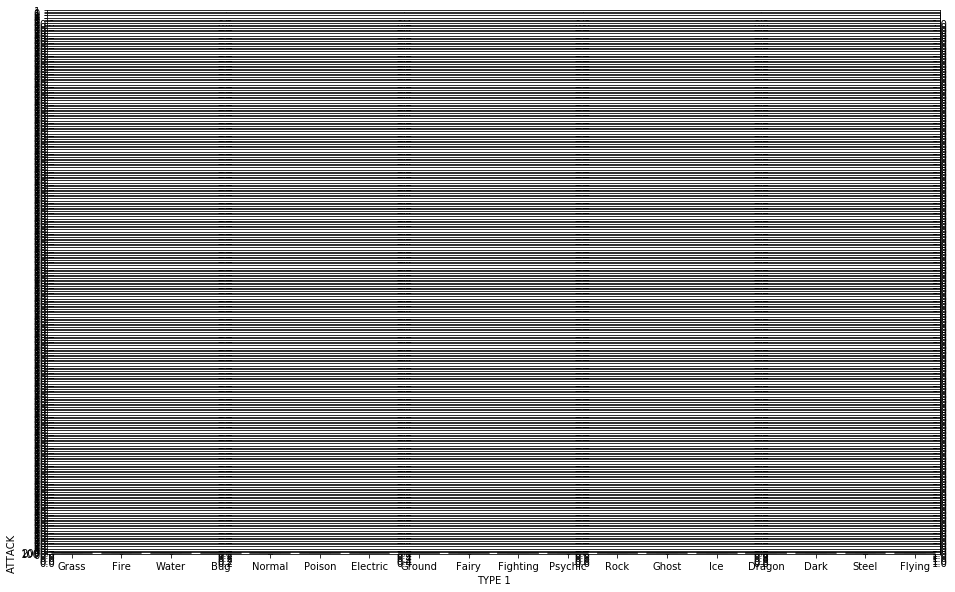

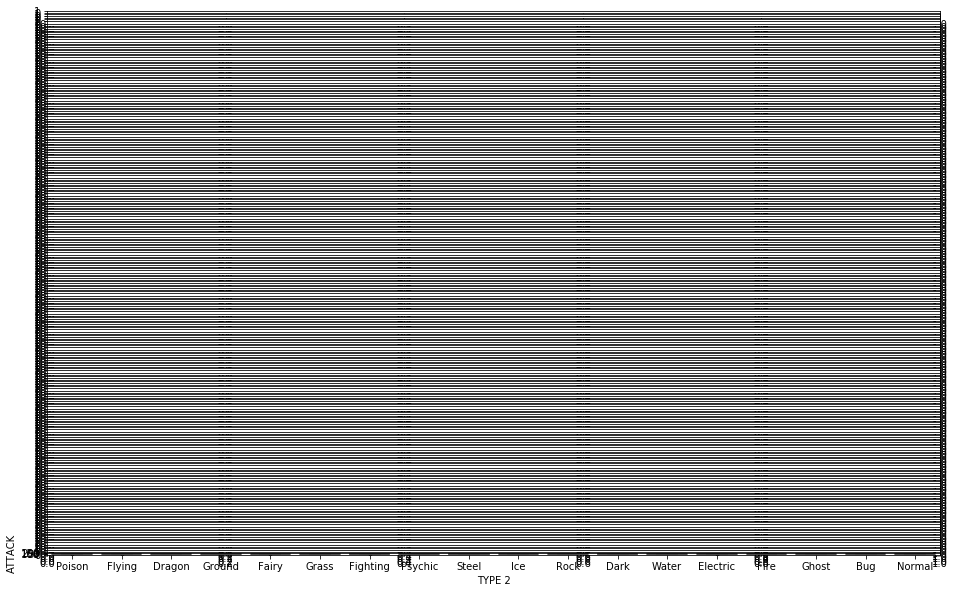

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

pylab.rcParams['figure.figsize'] = (16, 10)

plt.subplots(211)
sns.boxplot(x="TYPE 1", y="ATTACK", data=df)

plt.subplots(212)
sns.boxplot(x="TYPE 2", y="ATTACK", data=df)

### 第四题：创建新的一列，column名为 flag，要求如下：

1. 计算total的百分25分位数，百分50分位数，百分75分位数 分别记 Q1,Q2,Q3
2. 小于等于Q1，flag值为1，大于Q1小于等于Q2，flag值为2，大于Q2小于等于Q3，flag值为3

In [ ]:
Q1 = df['TOTAL'].quantile(0.25)
Q2 = df['TOTAL'].quantile(0.50)
Q3 = df['TOTAL'].quantile(0.75)

df.loc[(df['TOTAL'] <= Q1),"flag"] = 1
df.loc[((df['TOTAL'] > Q1) & (df['TOTAL'] <= Q2)),"flag"] = 2
df.loc[((df['TOTAL'] > Q2) & (df['TOTAL'] <= Q3)),"flag"] = 3

In [ ]:
df['flag'].value_counts()

### 第五题：分组计算，要求如下：
1. 将TYPE1,TYPE2设置为索引，据索引TYPE1,TYPE2进行数据分组，分组保存为变量G1
2. 根据G1，计算 HP的平均数，ATTACK的中位数，SPEED的平均数
3. G1过滤保留组内数据条数大于2的样本数据

In [ ]:
G1 = df.set_index(['TYPE 1', 'TYPE 2']).groupby(['TYPE 1', 'TYPE 2'])

In [ ]:
G1.agg({'HP' : np.mean, 'ATTACK' : np.median, 'SPEED' : np.mean})

In [ ]:
G1.filter(lambda s : len(s) > 2)

### 第六题：逻辑筛选
要求取出符合以下要求的数据： TYPE1等于 Fire或者 Dragon  并且 TYPE2等于 Fire或者 Dragon

In [ ]:
df.loc[((df['TYPE 1'] == 'Fire') | (df['TYPE 1'] == 'Dragon')) & 
       ((df['TYPE 2'] == 'Fire') | (df['TYPE 2'] == 'Dragon'))]